In [128]:
import wikipedia
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tqdm
import requests
import urllib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [53]:
data = pd.read_pickle("data/connected_sources/2016")

In [125]:
def extract_size(url, name):
    r = requests.get(url.format(urllib.parse.quote(name)))
    pid = list(r.json()['query']['pages'].keys())[0]
    print(pid)
    p = wikipedia.page(pageid=pid)
    return len(p.content.replace("\n", "").replace("==","").strip(" ").split(" "))

In [129]:
def get_article_size(name):
    """ Returns number of words per article
    """
#     wiki_url = x["WikiURL"]
    url = "https://en.wikipedia.org/w/api.php?action=query&titles={}&format=json"
    page = ""
    try:
        page = wikipedia.page(name)
    except:
        print(name)
        try:
            return extract_size(url, name)
        except:
            return 0 
    return len(page.content.replace("\n", "").replace("==","").strip(" ").split(" "))

In [130]:
d = data.head(500)
d['article_size'] = d["name_u"].apply(lambda x: get_article_size(x))

Thomas_Clausen_(Louisiana)
40740861
Yang_Ti-liang
812575
Iain_Smith_(Scottish_politician)
363063
Al_Smith
172040
Antoine_Wright_(politician)
41492548
Alun_Davies_(politician)
11099872
Walter_E._Fauntroy
309582
Liza_M._Ortiz
33499177
James_W._Mott
11595259
George_D._Perkins
11585587
Francis_W._Eppes
5050360
Alexander_H._Conner
27633456
Chiu_Chuang-huan
39737021
Hyman_Goldstein_(politician)
28293321
Ahn_Sang-soo_(born_May_1946)
35663256
William_Bennett_(English_politician)
27672727
Lyn_Brown_(politician)
1853133
Jean-Jacques_Susini
15555956
Zhang_Jian_(politician)
19235575
John_White_(Louisiana_politician)
40856828
Alex_C._Ruffing
31082519
Jalila_Jefferson-Bullock
23125498
John_McCoy_(politician)
57262391
Stephen_F._Chadwick
5720234
Robert_Sharman-Crawford
27912137
Victoria_Hernandez-Reyes
15686447
Henry_E._Cooper
4182918
Ray_Stevens_(politician)
21400533
Donald_Lee_(politician)
23638957
Patricia_R._Bellock
6524042
Charles_Jordan_(government_official)
36464423
Francisco_Forteza_(son)
179

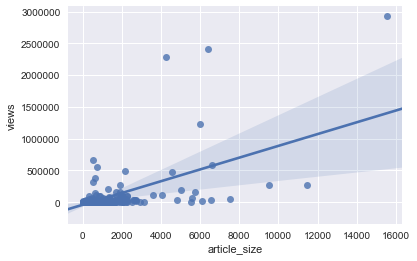

In [131]:
sns.regplot("article_size", "views", d)

In [133]:
d["views"].corr(d["article_size"])

0.5926293971465133

In [134]:
d.corr()

,ID,entered,efficiency,eig_central,id,in_degree,k_core,out_degree,views,article_size
ID,1.000000,-0.059660,-0.019431,0.024525,1.000000,0.019462,0.041715,0.053868,0.035341,0.049965
entered,-0.059660,1.000000,0.152885,-0.211834,-0.059660,-0.298192,-0.454160,-0.370411,-0.175828,-0.313746
efficiency,-0.019431,0.152885,1.000000,0.021840,-0.019431,0.027930,-0.172130,-0.098638,0.055115,-0.048835
eig_central,0.024525,-0.211834,0.021840,1.000000,0.024525,0.722868,0.539430,0.457541,0.793004,0.606132
id,1.000000,-0.059660,-0.019431,0.024525,1.000000,0.019462,0.041715,0.053868,0.035341,0.049965
in_degree,0.019462,-0.298192,0.027930,0.722868,0.019462,1.000000,0.758154,0.712732,0.760528,0.519610
k_core,0.041715,-0.454160,-0.172130,0.539430,0.041715,0.758154,1.000000,0.904632,0.531199,0.582423
out_degree,0.053868,-0.370411,-0.098638,0.457541,0.053868,0.712732,0.904632,1.000000,0.479532,0.573077
views,0.035341,-0.175828,0.055115,0.793004,0.035341,0.760528,0.531199,0.479532,1.000000,0.592629
article_size,0.049965,-0.313746,-0.048835,0.606132,0.049965,0.519610,0.582423,0.573077,0.592629,1.000000
